## Importing Required Libraries

In [17]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [18]:
from matplotlib import style
style.use('fivethirtyeight')
data_dir = 'C:\\Users\\prajw\\OneDrive\\Desktop\\trafic sign classifaition\\dataset'
train_path = 'C:\\Users\\prajw\\OneDrive\\Desktop\\trafic sign classifaition\\dataset\\Train'
test_path = 'C:\\Users\\prajw\\OneDrive\\Desktop\\trafic sign classifaition\\dataset\\Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## Finding Total Classes

In [19]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

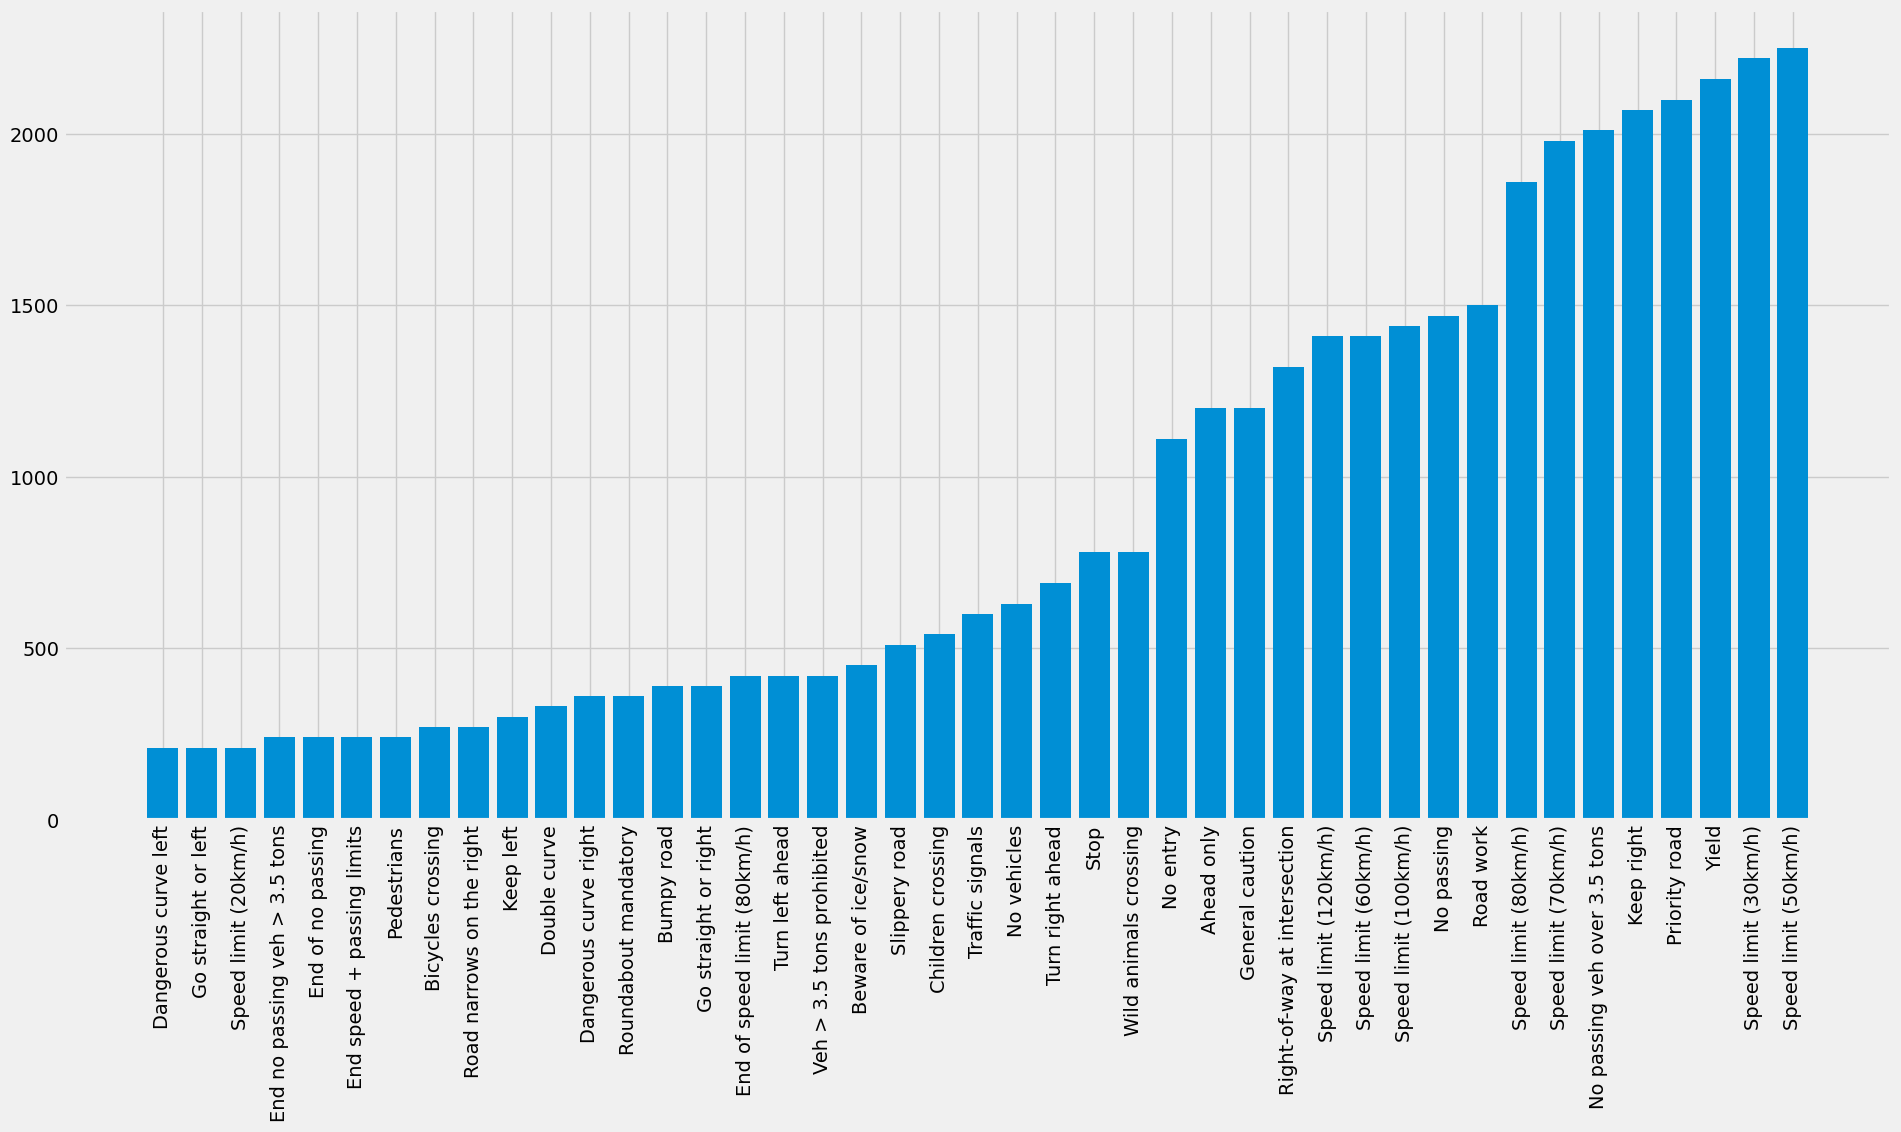

In [20]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

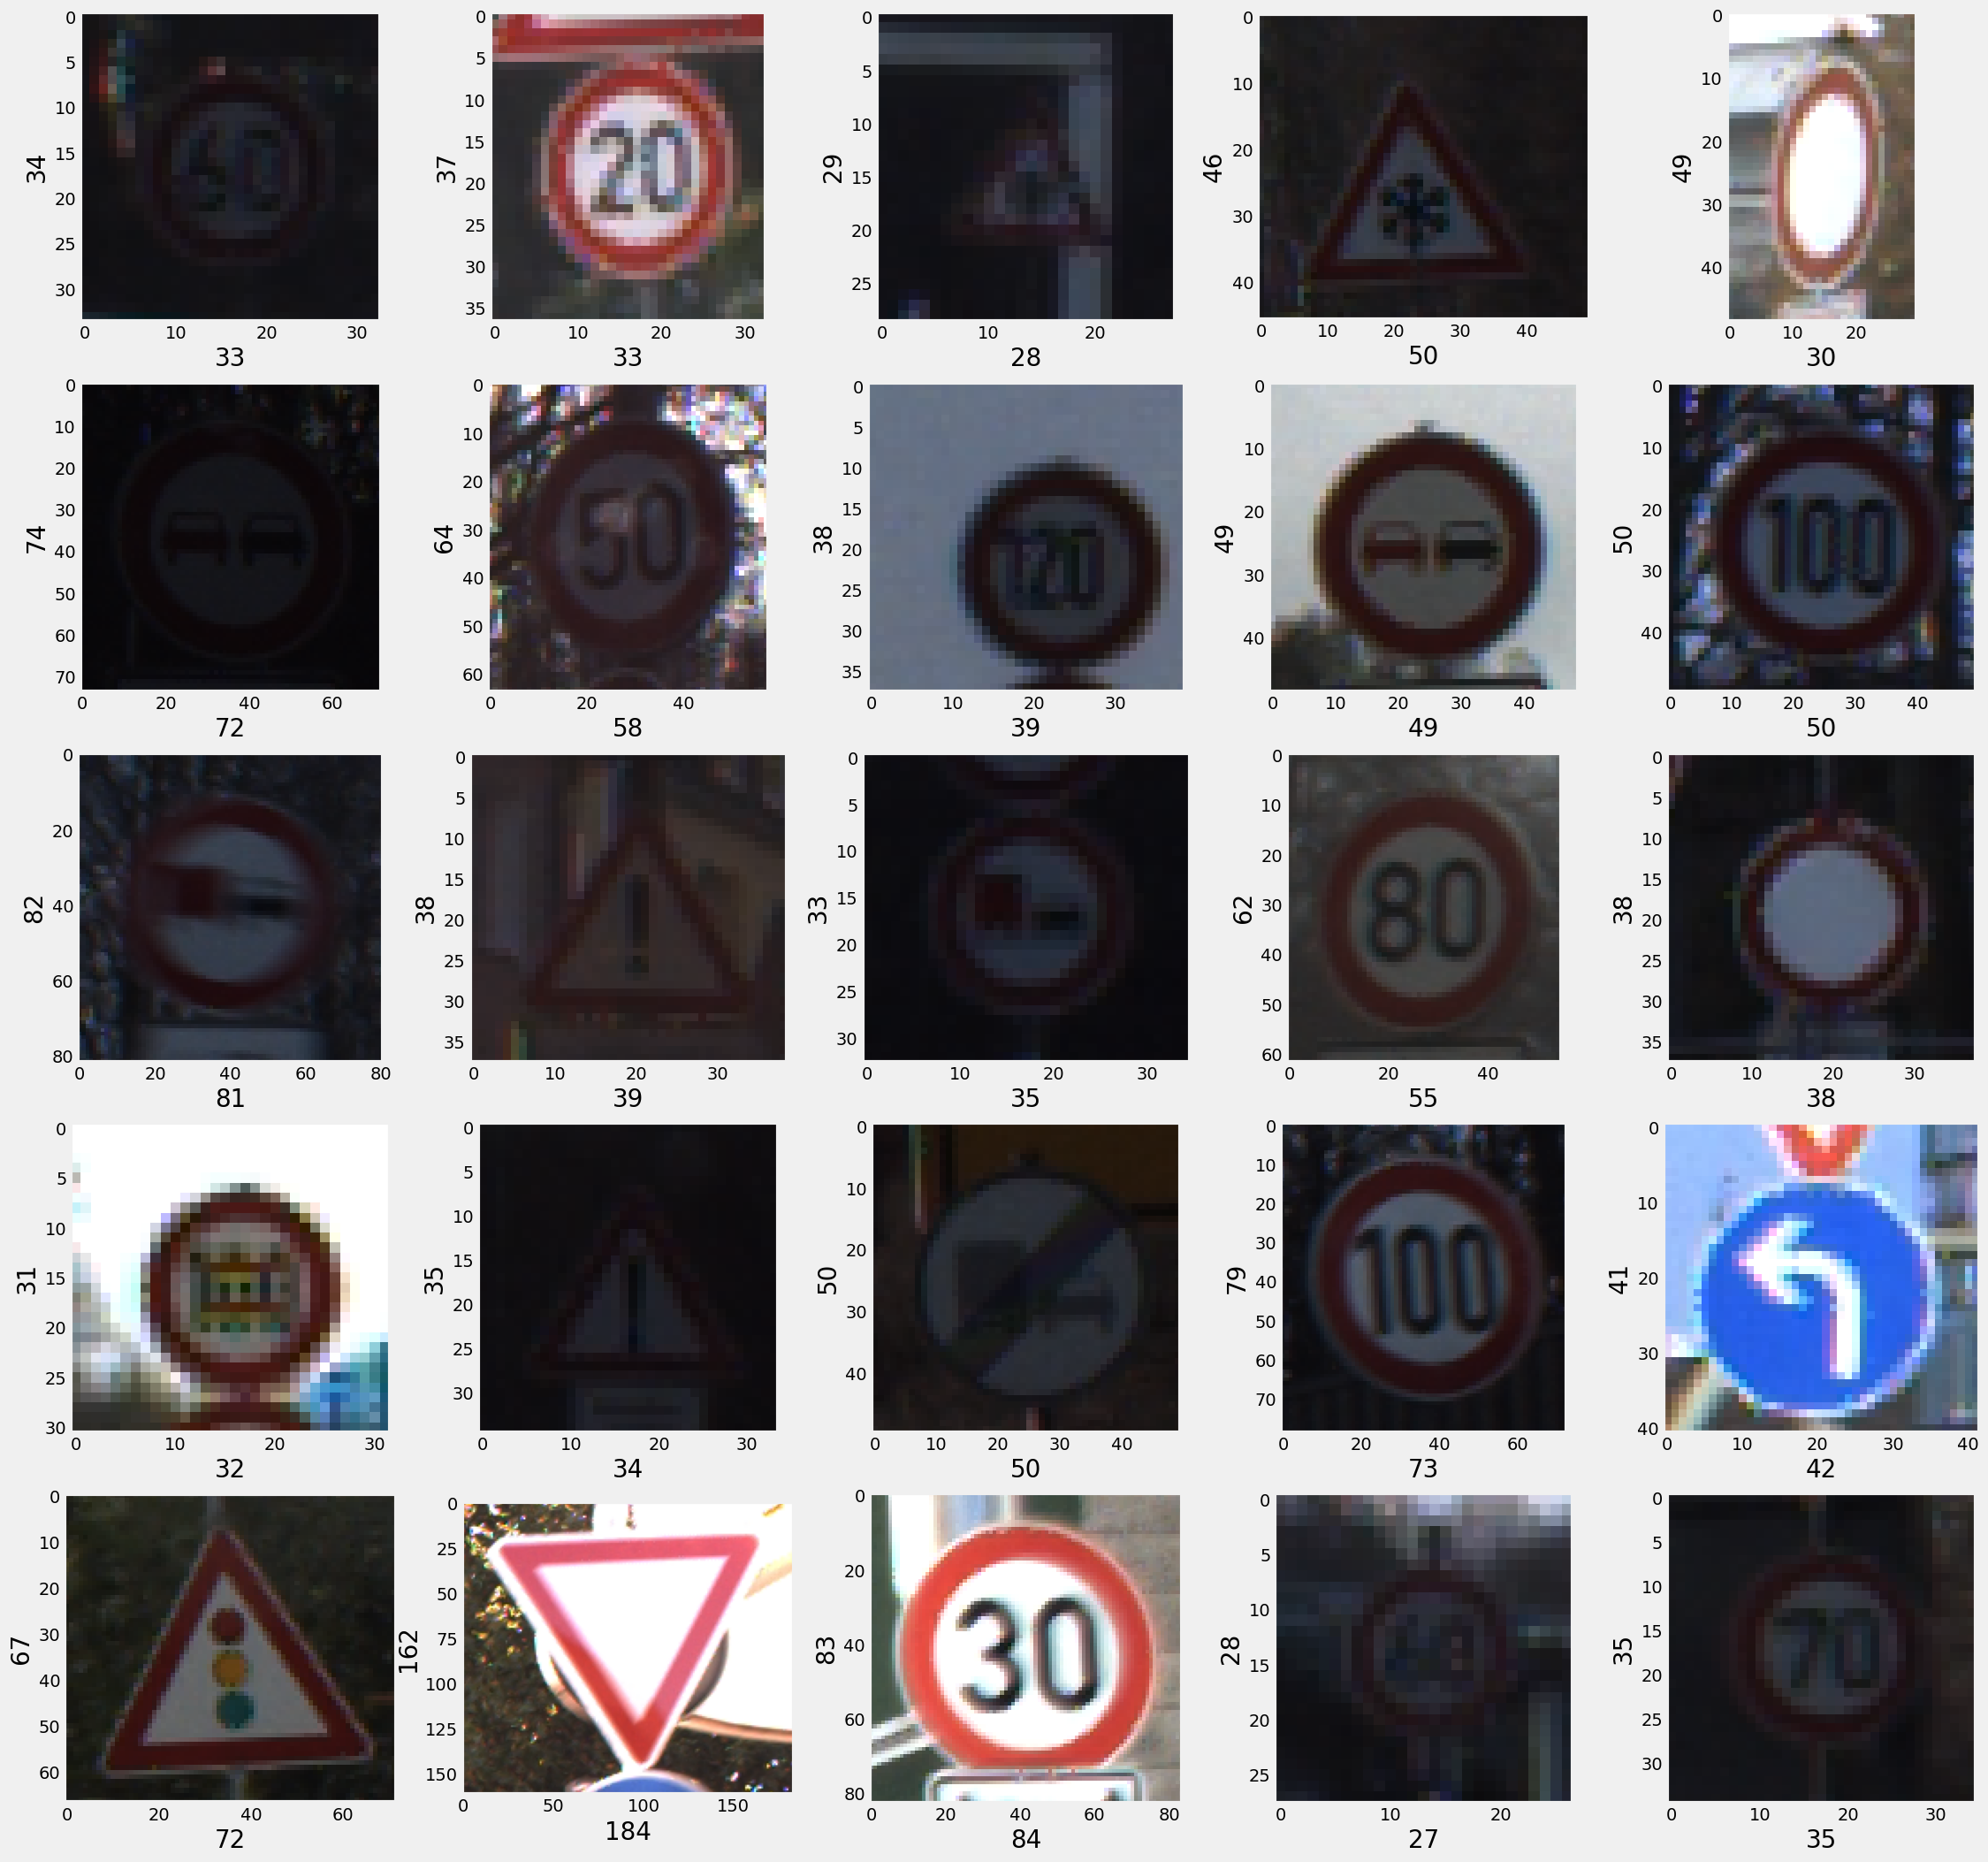

In [21]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt

data_dir = r'C:\Users\prajw\OneDrive\Desktop\trafic sign classifaition\dataset'

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25, 25))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)  # Turn off the grid
    plt.xlabel(rand_img.shape[1], fontsize=20)  # Width of the image
    plt.ylabel(rand_img.shape[0], fontsize=20)  # Height of the image
    plt.show()



## Collecting the Training Data

In [22]:
image_data = []
image_labels = []
 # Reading, resizing, and appending images to the data and labels lists
for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)
X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
(27446, 43)
(11763, 43)


## Shuffling the training data

In [23]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
(27446, 43)
(11763, 43)


In [24]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(NUM_CATEGORIES, activation='softmax')
])


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# CNN architecture with convolutional layers, max pooling, and dense layers

In [26]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train)
 # Training the CNN model using the augmented data.

In [29]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
858/858 [==============================] - 29s 34ms/step - loss: 1.3968 - accuracy: 0.5766 - val_loss: 0.6369 - val_accuracy: 0.8104
Epoch 2/20
858/858 [==============================] - 36s 42ms/step - loss: 0.7927 - accuracy: 0.7530 - val_loss: 0.3454 - val_accuracy: 0.8955
Epoch 3/20
858/858 [==============================] - 27s 32ms/step - loss: 0.5673 - accuracy: 0.8301 - val_loss: 0.2297 - val_accuracy: 0.9307
Epoch 4/20
858/858 [==============================] - 33s 39ms/step - loss: 0.4465 - accuracy: 0.8621 - val_loss: 0.1634 - val_accuracy: 0.9543
Epoch 5/20
858/858 [==============================] - 25s 29ms/step - loss: 0.3551 - accuracy: 0.8938 - val_loss: 0.1420 - val_accuracy: 0.9617
Epoch 6/20
858/858 [==============================] - 27s 31ms/step - loss: 0.2920 - accuracy: 0.9098 - val_loss: 0.1138 - val_accuracy: 0.9722
Epoch 7/20
858/858 [==============================] - 23s 27ms/step - loss: 0.2543 - accuracy: 0.9224 - val_loss: 0.1043 - val_accuracy:

In [30]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

368/368 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9863
Validation Loss: 0.0511, Validation Accuracy: 0.9863


368/368 [==============================] - 1s 4ms/step


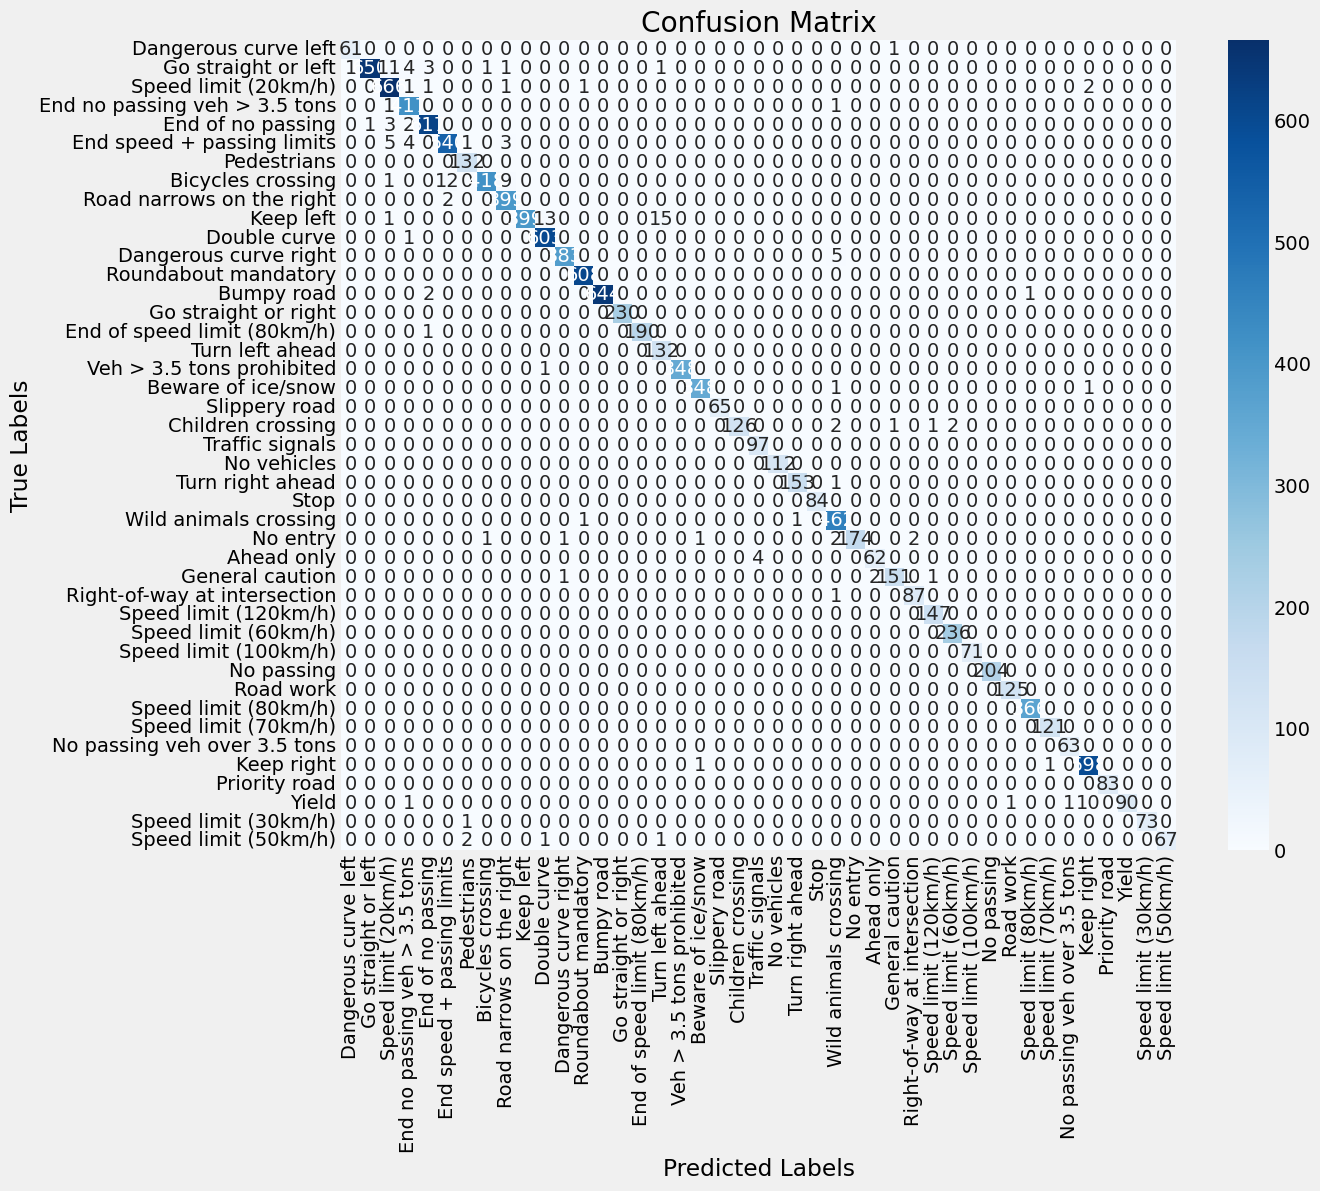

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'model' is your trained model and 'X_val' is your validation data
# Make predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

# Assuming 'y_val' is your true labels in one-hot encoded format
y_true = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blue', xticklabels=class_num, yticklabels=class_num)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
 # Visualize the model's performance on the validation set

In [33]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_num))


368/368 [==============================] - 1s 3ms/step
                               precision    recall  f1-score   support

         Dangerous curve left       0.98      0.98      0.98        62
          Go straight or left       1.00      0.97      0.98       672
         Speed limit (20km/h)       0.97      0.99      0.98       672
End no passing veh > 3.5 tons       0.97      1.00      0.98       419
            End of no passing       0.99      0.99      0.99       623
   End speed + passing limits       0.97      0.98      0.98       553
                  Pedestrians       0.97      1.00      0.99       132
            Bicycles crossing       1.00      0.95      0.97       440
    Road narrows on the right       0.97      1.00      0.98       401
                    Keep left       1.00      0.93      0.96       428
                 Double curve       0.98      1.00      0.99       604
        Dangerous curve right       0.99      0.99      0.99       388
         Roundabout m

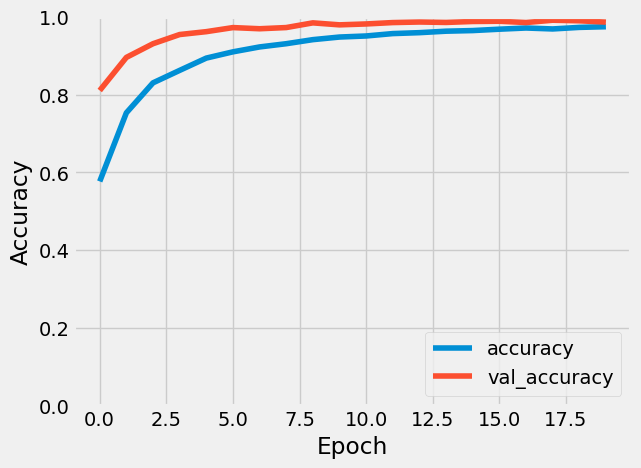

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


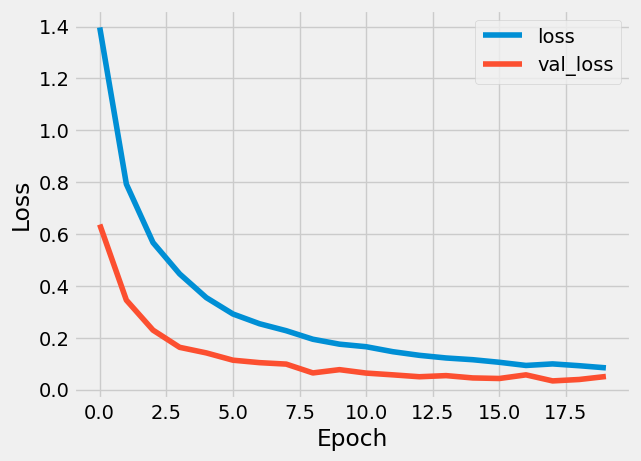

In [45]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object from training your model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


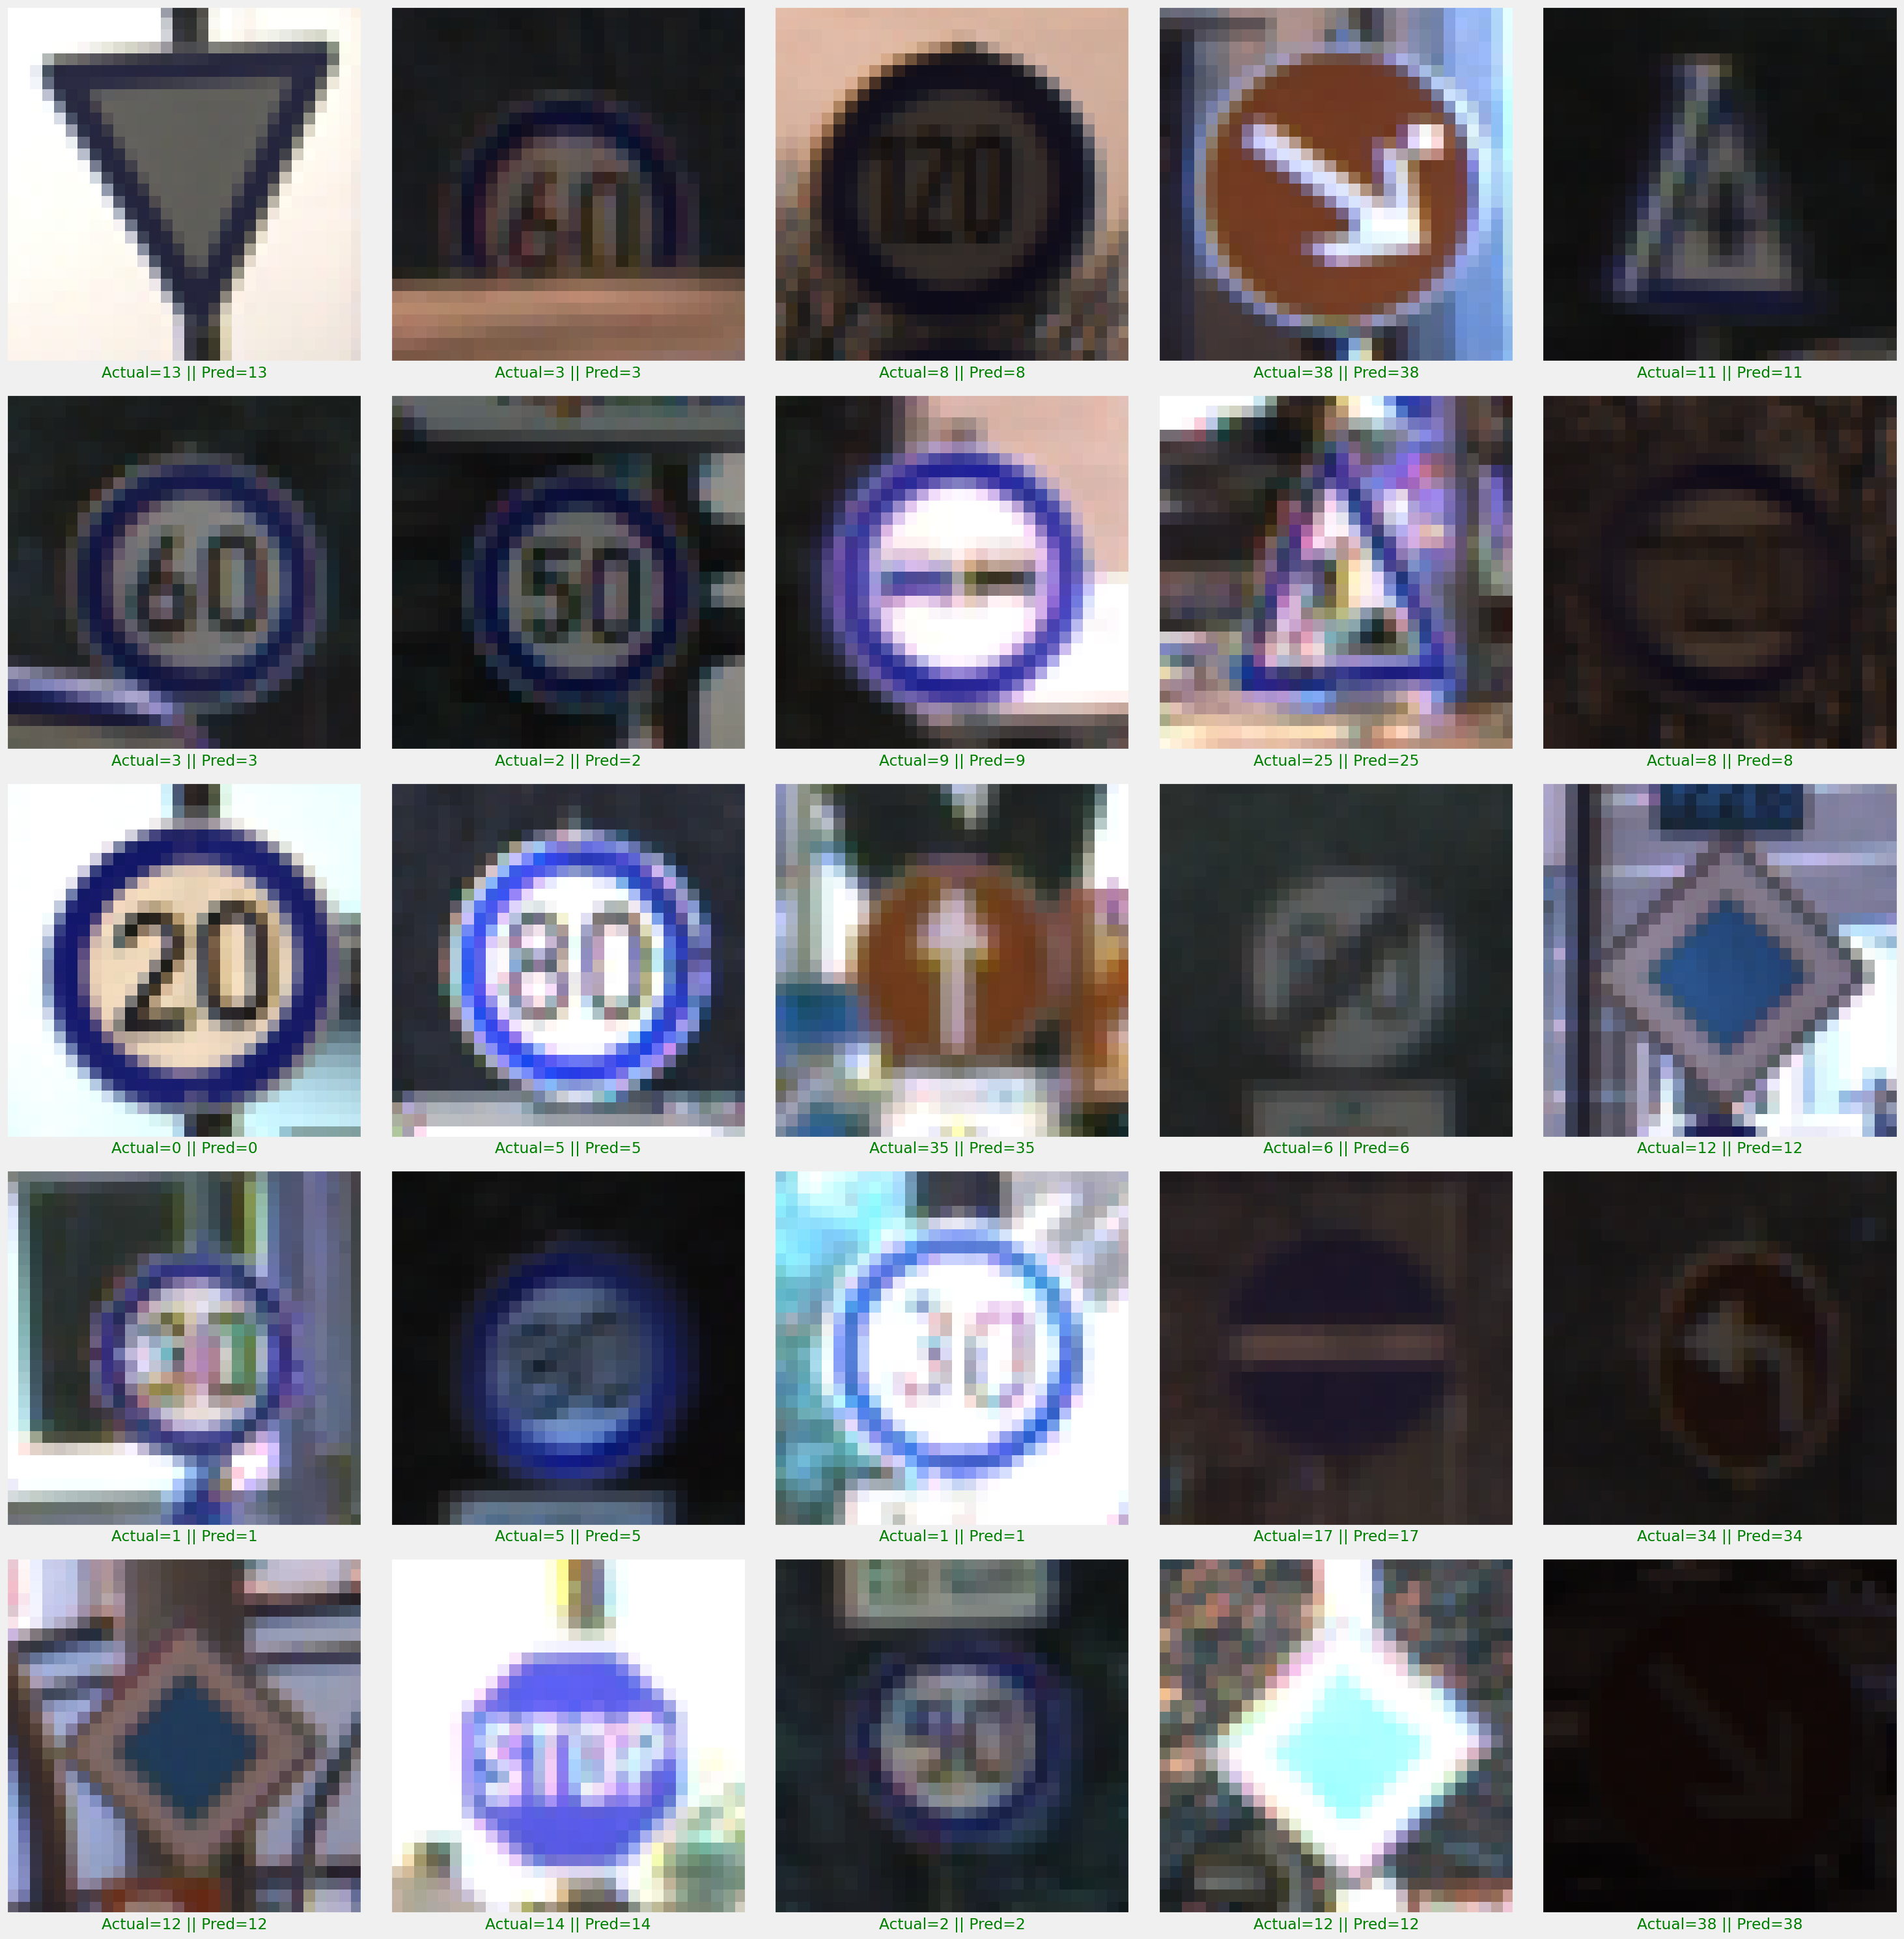

In [34]:
plt.figure(figsize=(30, 30))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    prediction = y_pred[start_index + i]
    actual = y_true[start_index + i]
    
    col = 'g'
    if prediction != actual:
        col = 'r'
    
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color=col)
    plt.imshow(X_val[start_index + i])
    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [46]:
# Saving model
model.save("model_20_epochs.h5")


c:\Users\prajw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


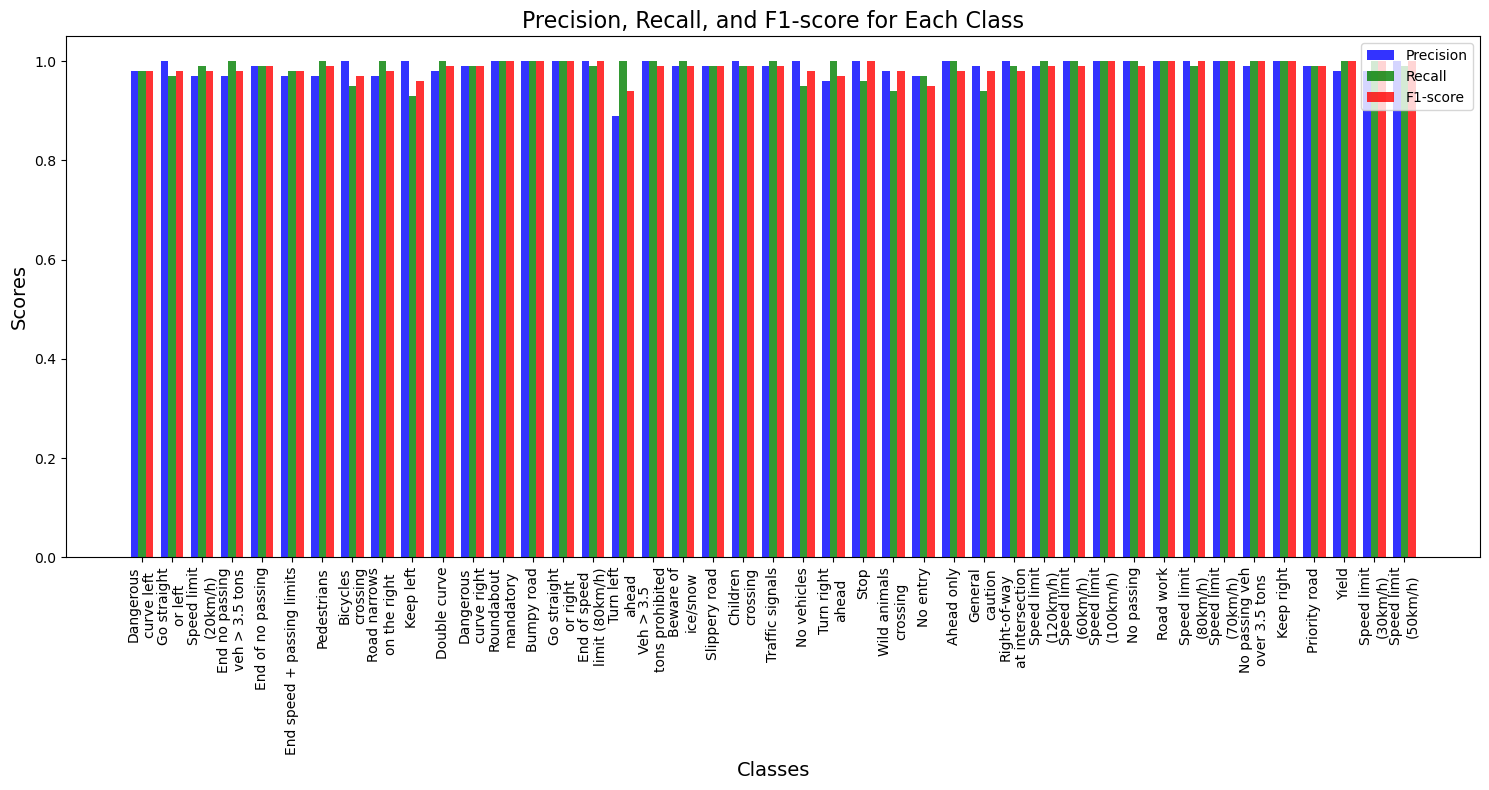

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have precision, recall, f1_score, and classes defined
# Replace these arrays with your actual data
precision = [0.98, 1.00, 0.97, 0.97, 0.99, 0.97, 0.97, 1.00, 0.97, 1.00, 
              0.98, 0.99, 1.00, 1.00, 1.00, 1.00, 0.89, 1.00, 0.99, 0.99, 
              1.00, 0.99, 1.00, 0.96, 1.00, 0.98, 0.97, 1.00, 0.99, 1.00, 
              0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 0.99, 
              0.98, 0.98, 1.00, 0.98, 1.00, 1.00, 1.00, 1.00]  # List of precision values
recall = [0.98, 0.97, 0.99, 1.00, 0.99, 0.98, 1.00, 0.95, 1.00, 0.93, 
           1.00, 0.99, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 0.99, 
           0.99, 1.00, 0.95, 1.00, 0.96, 0.94, 0.97, 1.00, 0.94, 0.99, 
           1.00, 1.00, 1.00, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 0.99, 
           1.00, 1.00, 0.99, 1.00, 1.00, 0.87, 0.99, 0.94]    # List of recall values
f1_score =  [0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.99, 0.97, 0.98, 0.96, 
             0.99, 0.99, 1.00, 1.00, 1.00, 1.00, 0.94, 0.99, 0.99, 0.99, 
             0.99, 0.99, 0.98, 0.97, 1.00, 0.98, 0.95, 0.98, 0.98, 0.98, 
             0.99, 0.99, 1.00, 0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 0.99, 
             1.00, 1.00, 1.00, 1.00, 0.93, 0.99, 0.99] # List of F1-score values
classes = ["Dangerous\ncurve left", "Go straight\nor left", "Speed limit\n(20km/h)", 
           "End no passing\nveh > 3.5 tons", "End of no passing", 
           "End speed + passing limits", "Pedestrians", "Bicycles\ncrossing", 
           "Road narrows\non the right", "Keep left", "Double curve", 
           "Dangerous\ncurve right", "Roundabout\nmandatory", "Bumpy road", 
           "Go straight\nor right", "End of speed\nlimit (80km/h)", 
           "Turn left\nahead", "Veh > 3.5\ntons prohibited", 
           "Beware of\nice/snow", "Slippery road", "Children\ncrossing", 
           "Traffic signals", "No vehicles", "Turn right\nahead", 
           "Stop", "Wild animals\ncrossing", "No entry", "Ahead only", 
           "General\ncaution", "Right-of-way\nat intersection", 
           "Speed limit\n(120km/h)", "Speed limit\n(60km/h)", 
           "Speed limit\n(100km/h)", "No passing", "Road work", 
           "Speed limit\n(80km/h)", "Speed limit\n(70km/h)", 
           "No passing veh\nover 3.5 tons", "Keep right", 
           "Priority road", "Yield", "Speed limit\n(30km/h)", 
           "Speed limit\n(50km/h)"]   # List of class names

# Ensure that precision, recall, and f1_score have the same length
precision = precision[:len(classes)]
recall = recall[:len(classes)]
f1_score = f1_score[:len(classes)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.25
opacity = 0.8

index = np.arange(len(classes))

rects1 = ax.bar(index - bar_width, precision, bar_width, alpha=opacity, color='b', label='Precision')
rects2 = ax.bar(index, recall, bar_width, alpha=opacity, color='g', label='Recall')
rects3 = ax.bar(index + bar_width, f1_score, bar_width, alpha=opacity, color='r', label='F1-score')

ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Precision, Recall, and F1-score for Each Class', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(classes, rotation=90, fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()
